In [2]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [11]:
# URL containing the data
import requests  
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    print("Webpage downloaded successfully!")
else:
    print(f"Failed to retrieve webpage. Status code: {response.status_code}")


Webpage downloaded successfully!


In [12]:
import requests
from bs4 import BeautifulSoup  # <-- You missed importing this

# URL containing the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    print("Webpage downloaded successfully!")

    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')

    # Optional: Print the first 200 characters to preview the content
    print(soup.prettify()[:200])

else:
    print(f"Failed to retrieve webpage. Status code: {response.status_code}")


Webpage downloaded successfully!
<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    print("Webpage downloaded successfully!")

    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the first table in the HTML
    table = soup.find('table')

    # Initialize lists to store the data
    languages = []
    salaries = []

    # Loop through the table rows (skipping the header)
    for row in table.find_all('tr')[1:]:  # Skip the first row (header)
        cols = row.find_all('td')
        if len(cols) >= 4:  # Ensure we have enough columns
            language = cols[1].text.strip()  # Second column is 'Language'
            salary = cols[3].text.strip()    # Fourth column is 'Average Annual Salary'
            languages.append(language)
            salaries.append(salary)

    # Create a DataFrame to store the scraped data
    df = pd.DataFrame({
        'Programming Language': languages,
        'Average Annual Salary': salaries
    })

    # Display the result
    print(df)

else:
    print(f"Failed to retrieve webpage. Status code: {response.status_code}")


Webpage downloaded successfully!
  Programming Language Average Annual Salary
0               Python              $114,383
1                 Java              $101,013
2                    R               $92,037
3           Javascript              $110,981
4                Swift              $130,801
5                  C++              $113,865
6                   C#               $88,726
7                  PHP               $84,727
8                  SQL               $84,793
9                   Go               $94,082


In [16]:
# Save the data to a CSV file
df.to_csv('popular-languages.csv', index=False)

print("Data has been saved to 'popular-languages.csv'")


Data has been saved to 'popular-languages.csv'


In [17]:
print(df.head(5))

  Programming Language Average Annual Salary
0               Python              $114,383
1                 Java              $101,013
2                    R               $92,037
3           Javascript              $110,981
4                Swift              $130,801


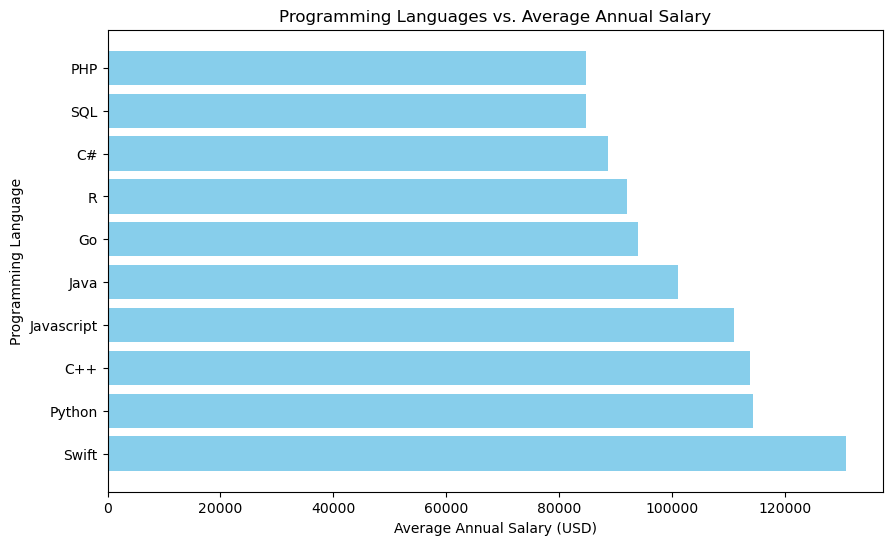

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('popular-languages.csv')

# Remove the dollar sign and commas, and convert the salary to numeric
df['Average Annual Salary'] = df['Average Annual Salary'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Sort the DataFrame by 'Average Annual Salary' in descending order
df_sorted = df.sort_values('Average Annual Salary', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Programming Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel('Average Annual Salary (USD)')
plt.ylabel('Programming Language')
plt.title('Programming Languages vs. Average Annual Salary')

# Display the chart
plt.show()
